Based on:
https://colab.research.google.com/github/nutonomy/nuscenes-devkit/blob/master/python-sdk/tutorials/nuscenes_lidarseg_panoptic_tutorial.ipynb

In [2]:
%matplotlib inline

from nuscenes import NuScenes
from dotenv import load_dotenv
import os

load_dotenv()
path = os.environ.get("NUSCENES_MINI")

nusc = NuScenes(version='v1.0-mini', dataroot=path, verbose=True)

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 0.390 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [4]:
nusc.list_lidarseg_categories(sort_by='index')

Calculating semantic point stats for nuScenes-lidarseg...
  0  noise                                    nbr_points=      12,561
  1  animal                                   nbr_points=           0
  2  human.pedestrian.adult                   nbr_points=      43,812
  3  human.pedestrian.child                   nbr_points=         230
  4  human.pedestrian.construction_worker     nbr_points=       1,412
  5  human.pedestrian.personal_mobility       nbr_points=       4,096
  6  human.pedestrian.police_officer          nbr_points=          64
  7  human.pedestrian.stroller                nbr_points=           0
  8  human.pedestrian.wheelchair              nbr_points=           0
  9  movable_object.barrier                   nbr_points=      55,298
 10  movable_object.debris                    nbr_points=          48
 11  movable_object.pushable_pullable         nbr_points=       2,293
 12  movable_object.trafficcone               nbr_points=       6,206
 13  static_object.bicycle_rack 

In [5]:
nusc.lidarseg_idx2name_mapping

{0: 'noise',
 1: 'animal',
 2: 'human.pedestrian.adult',
 3: 'human.pedestrian.child',
 4: 'human.pedestrian.construction_worker',
 5: 'human.pedestrian.personal_mobility',
 6: 'human.pedestrian.police_officer',
 7: 'human.pedestrian.stroller',
 8: 'human.pedestrian.wheelchair',
 9: 'movable_object.barrier',
 10: 'movable_object.debris',
 11: 'movable_object.pushable_pullable',
 12: 'movable_object.trafficcone',
 13: 'static_object.bicycle_rack',
 14: 'vehicle.bicycle',
 15: 'vehicle.bus.bendy',
 16: 'vehicle.bus.rigid',
 17: 'vehicle.car',
 18: 'vehicle.construction',
 19: 'vehicle.emergency.ambulance',
 20: 'vehicle.emergency.police',
 21: 'vehicle.motorcycle',
 22: 'vehicle.trailer',
 23: 'vehicle.truck',
 24: 'flat.driveable_surface',
 25: 'flat.other',
 26: 'flat.sidewalk',
 27: 'flat.terrain',
 28: 'static.manmade',
 29: 'static.other',
 30: 'static.vegetation',
 31: 'vehicle.ego'}

In [6]:
nusc.lidarseg_name2idx_mapping

{'noise': 0,
 'animal': 1,
 'human.pedestrian.adult': 2,
 'human.pedestrian.child': 3,
 'human.pedestrian.construction_worker': 4,
 'human.pedestrian.personal_mobility': 5,
 'human.pedestrian.police_officer': 6,
 'human.pedestrian.stroller': 7,
 'human.pedestrian.wheelchair': 8,
 'movable_object.barrier': 9,
 'movable_object.debris': 10,
 'movable_object.pushable_pullable': 11,
 'movable_object.trafficcone': 12,
 'static_object.bicycle_rack': 13,
 'vehicle.bicycle': 14,
 'vehicle.bus.bendy': 15,
 'vehicle.bus.rigid': 16,
 'vehicle.car': 17,
 'vehicle.construction': 18,
 'vehicle.emergency.ambulance': 19,
 'vehicle.emergency.police': 20,
 'vehicle.motorcycle': 21,
 'vehicle.trailer': 22,
 'vehicle.truck': 23,
 'flat.driveable_surface': 24,
 'flat.other': 25,
 'flat.sidewalk': 26,
 'flat.terrain': 27,
 'static.manmade': 28,
 'static.other': 29,
 'static.vegetation': 30,
 'vehicle.ego': 31}

In [7]:
my_sample = nusc.sample[87]

In [9]:
nusc.get_sample_lidarseg_stats(my_sample['token'], sort_by='name')

===== Statistics for 6dabc0fb1df045558f802246dd186b3f =====
 24  flat.driveable_surface                   n=       9,884
 25  flat.other                               n=       1,495
 26  flat.sidewalk                            n=       1,310
  2  human.pedestrian.adult                   n=          71
  9  movable_object.barrier                   n=         280
 11  movable_object.pushable_pullable         n=          11
  0  noise                                    n=          62
 28  static.manmade                           n=       4,650
 30  static.vegetation                        n=         330
 14  vehicle.bicycle                          n=           9
 16  vehicle.bus.rigid                        n=         105
 17  vehicle.car                              n=       3,291
 31  vehicle.ego                              n=      11,723
 22  vehicle.trailer                          n=         302
 23  vehicle.truck                            n=       1,229


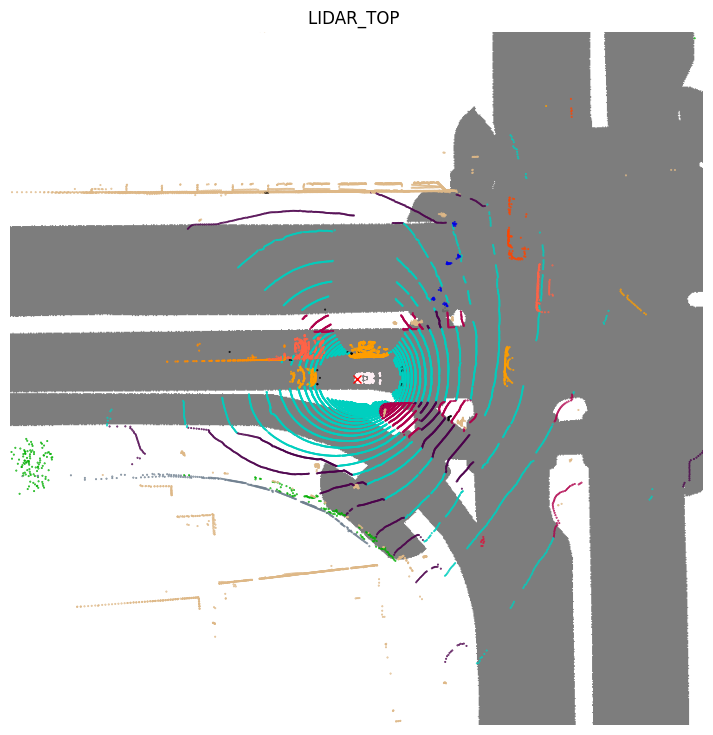

In [10]:
sample_data_token = my_sample['data']['LIDAR_TOP']
nusc.render_sample_data(sample_data_token,
                        with_anns=False,
                        show_lidarseg=True)

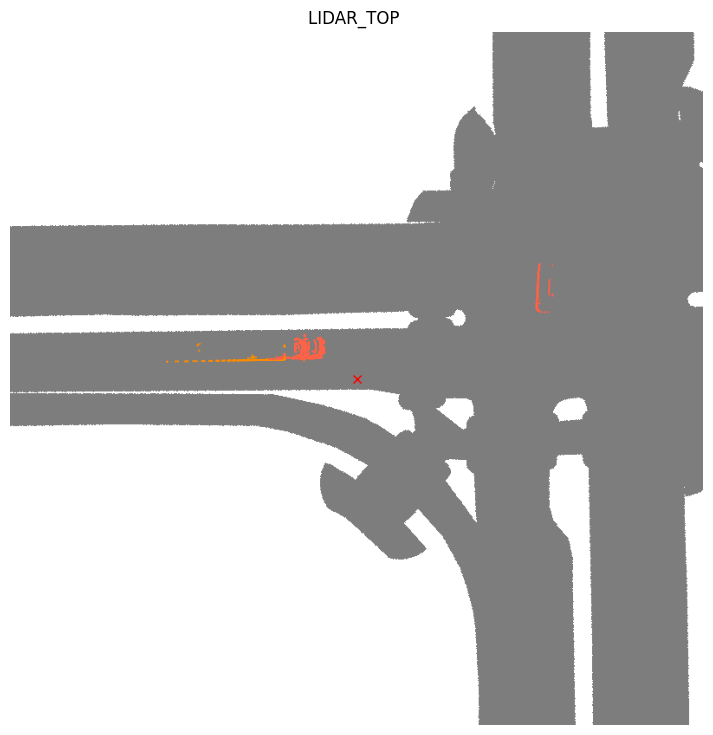

In [11]:

nusc.render_sample_data(sample_data_token,
                        with_anns=False,
                        show_lidarseg=True,
                        # only interested in trucks and trailers
                        filter_lidarseg_labels=[22, 23])

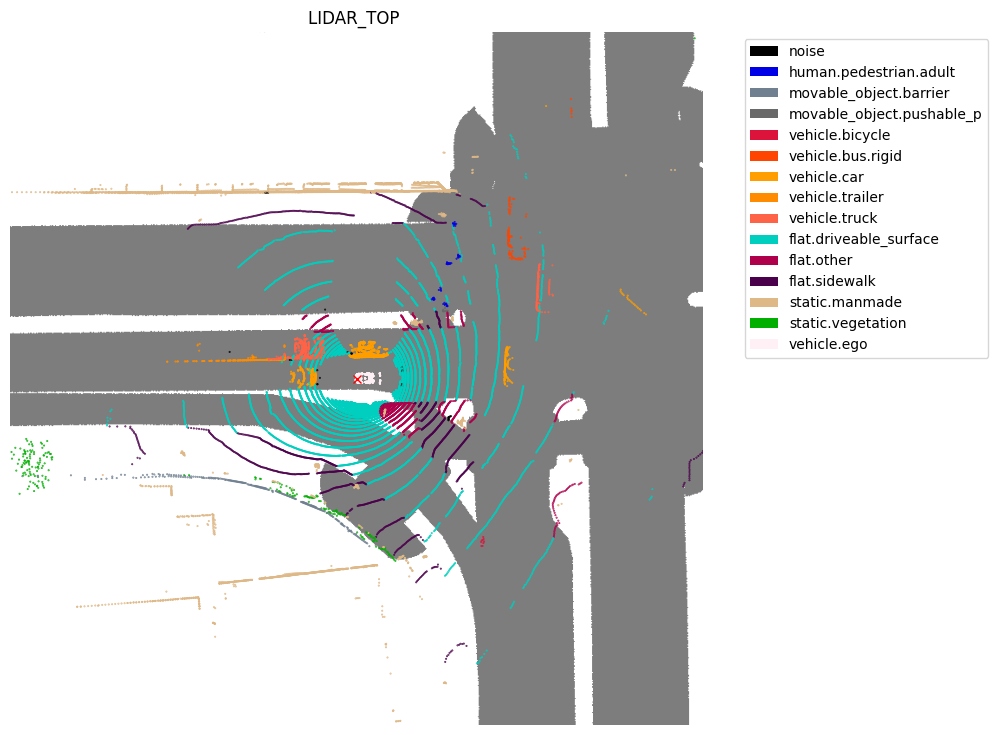

In [12]:
nusc.render_sample_data(sample_data_token,
                        with_anns=False,
                        show_lidarseg=True,
                        show_lidarseg_legend=True)

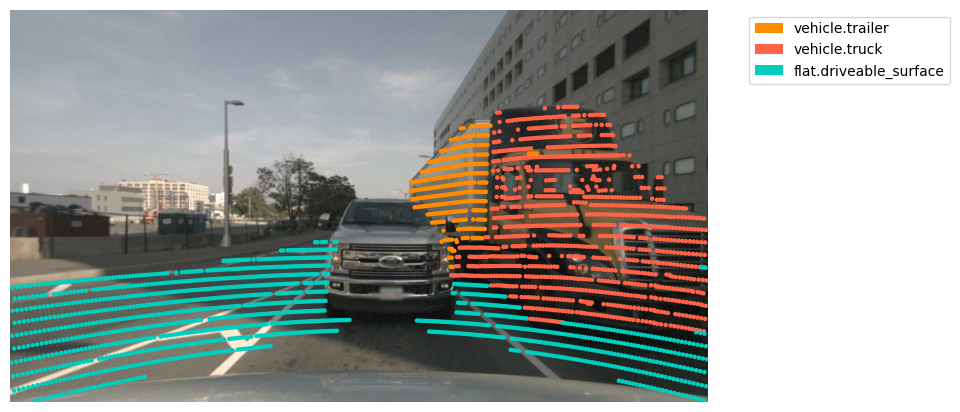

In [13]:
nusc.render_pointcloud_in_image(my_sample['token'],
                                pointsensor_channel='LIDAR_TOP',
                                camera_channel='CAM_BACK',
                                render_intensity=False,
                                show_lidarseg=True,
                                filter_lidarseg_labels=[22, 23, 24],
                                show_lidarseg_legend=True)

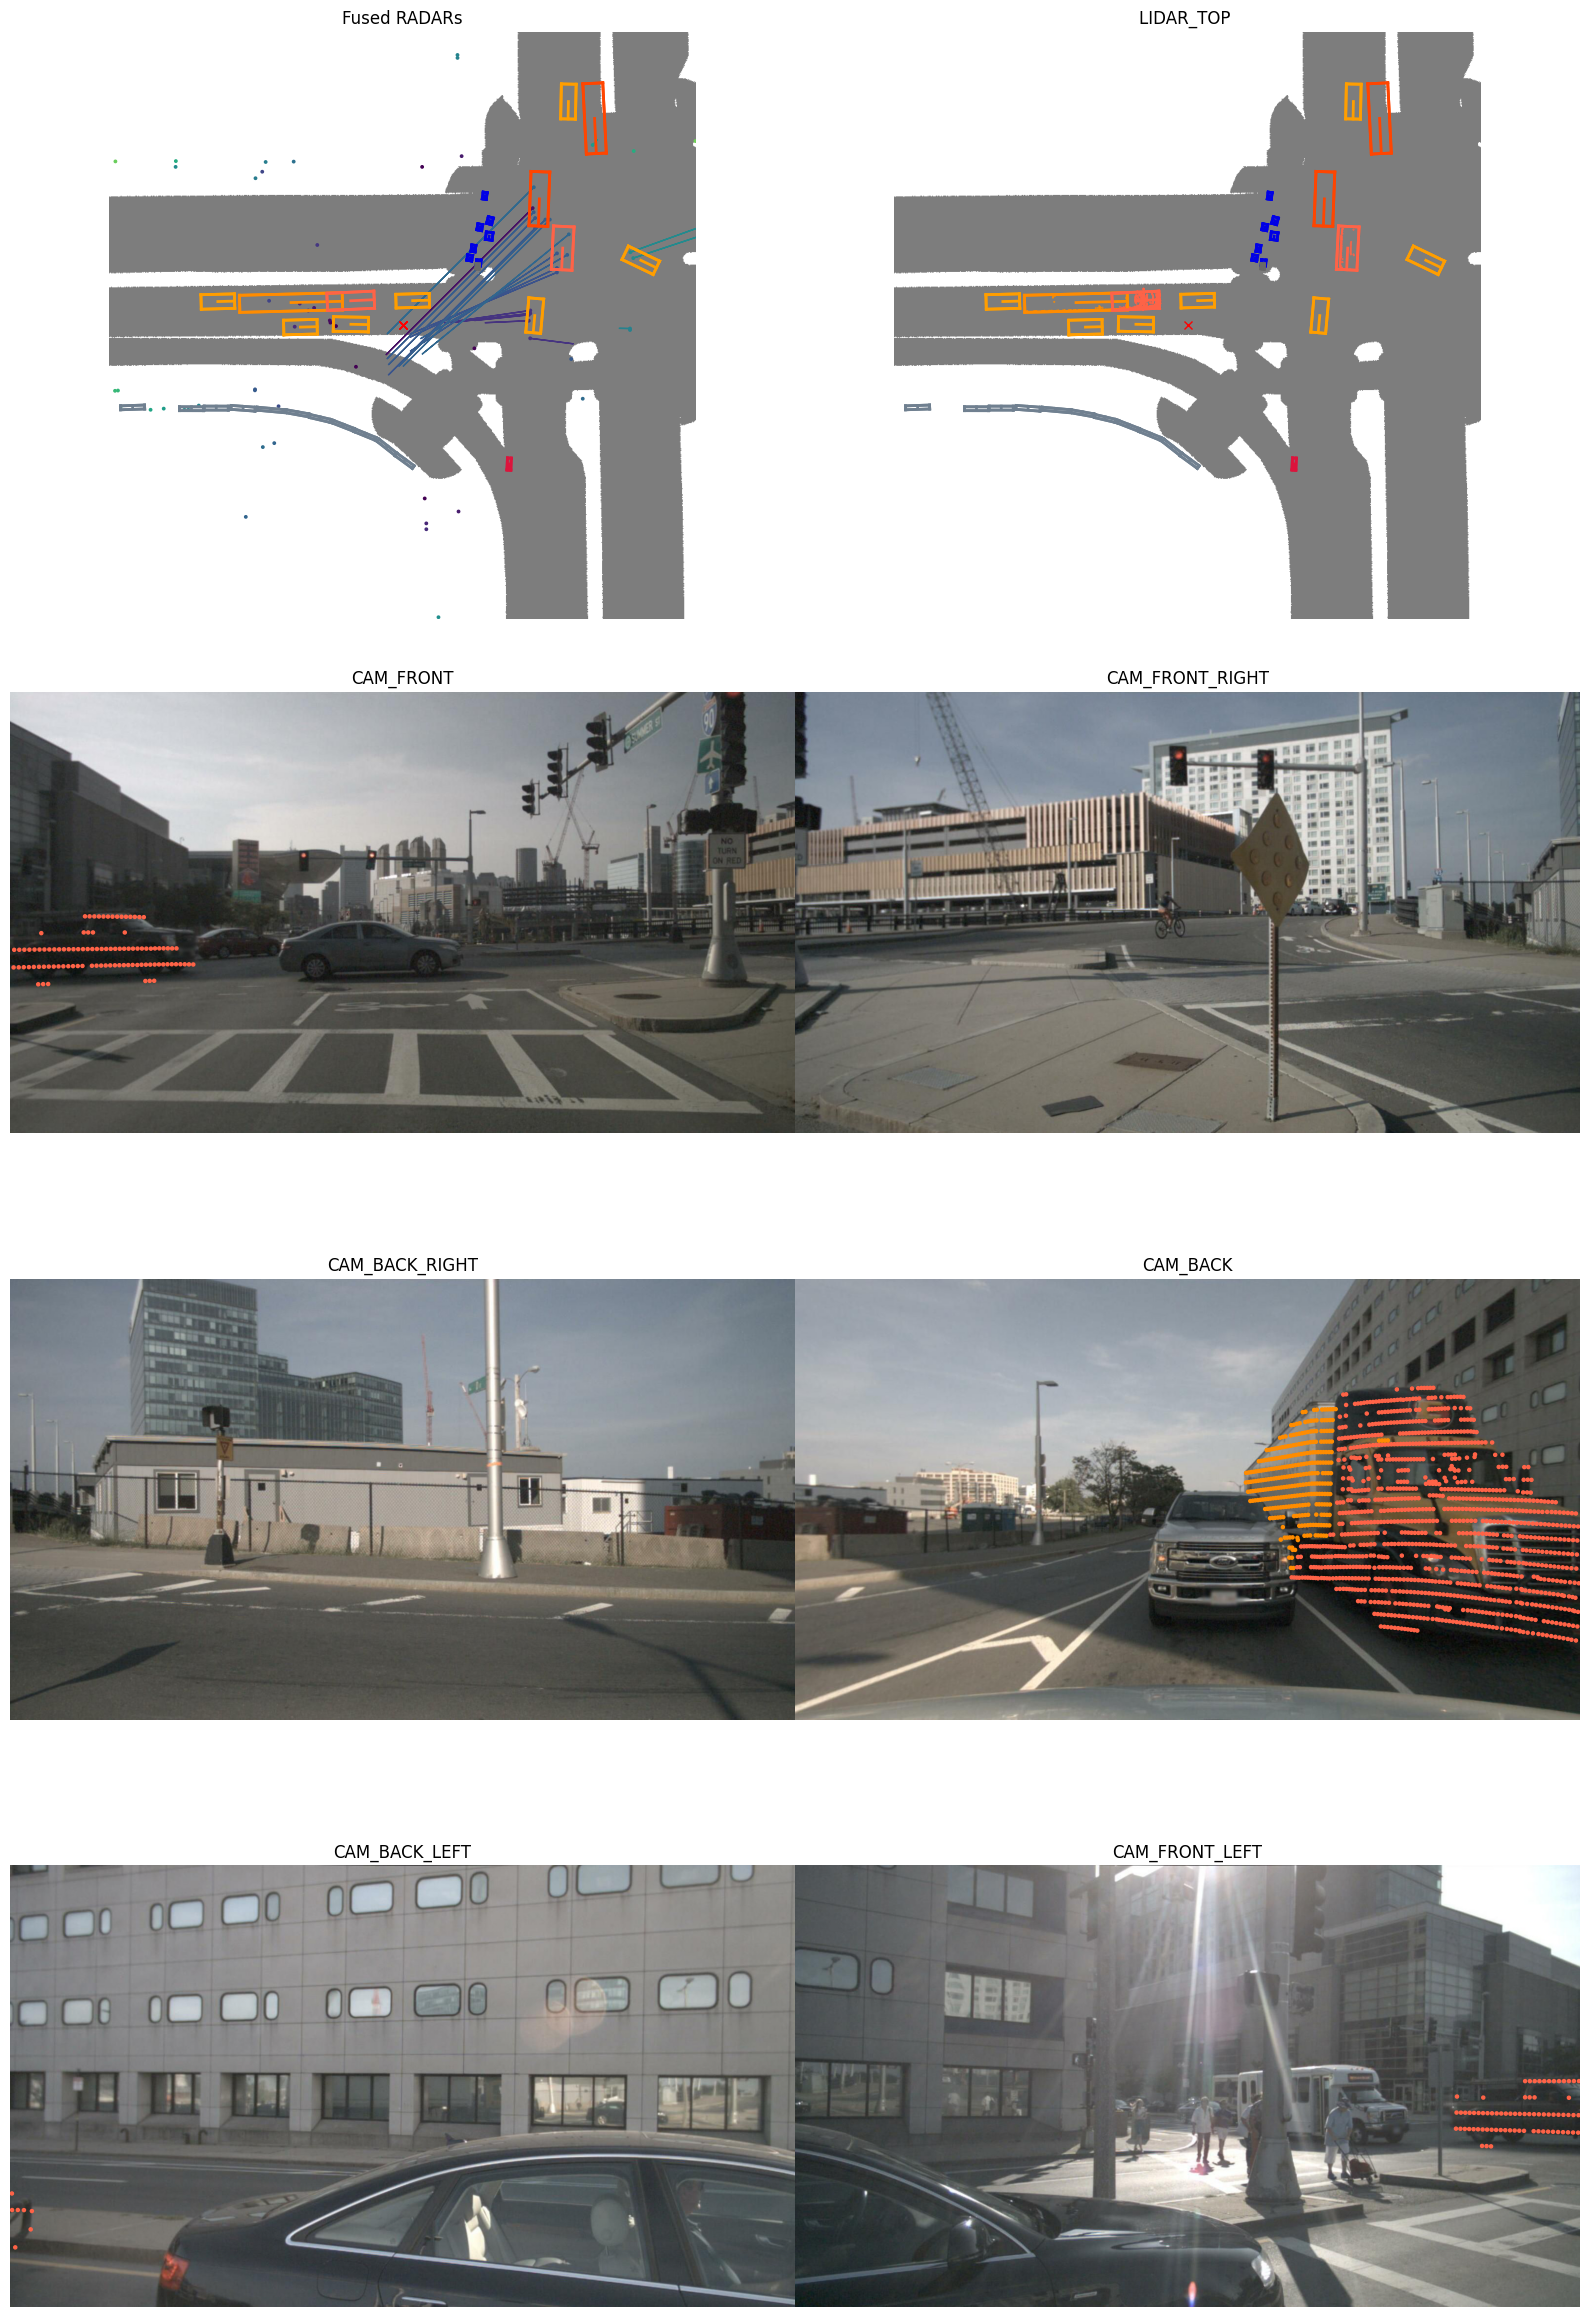

In [14]:
nusc.render_sample(my_sample['token'],
                   show_lidarseg=True,
                   filter_lidarseg_labels=[22, 23])

In [15]:
my_scene = nusc.scene[0]

In [16]:
# render the scene with the lidar segmentation labels.
# doesn't work in Jupyter Notebook stably
# import os
# nusc.render_scene_channel_lidarseg(my_scene['token'], 
#                                    'CAM_BACK', 
#                                    filter_lidarseg_labels=[18, 28],
#                                    verbose=True, 
#                                    dpi=100,
#                                    imsize=(1280, 720))

In [ ]:
# the code to save the rendered images to a folder
# nusc.render_scene_channel_lidarseg(my_scene['token'],
#                                    'CAM_BACK',
#                                    filter_lidarseg_labels=[18, 28],
#                                    verbose=True,
#                                    dpi=100,
#                                    imsize=(1280, 720),
#                                    render_mode='video',
#                                    out_folder=os.path.expanduser('~/Desktop/my_folder'))

In [ ]:
# save the rendered images to a video
# nusc.render_scene_lidarseg(my_scene['token'], 
#                            filter_lidarseg_labels=[17, 24],
#                            verbose=True,
#                            dpi=100,
#                            out_path=os.path.expanduser('~/Desktop/my_rendered_scene.avi'))